In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
#controlling variables
lr = 0.01
num_of_steps = 100000

<h2>Define your input data and expected labels</h2>

In [3]:
#XOR logic
x_data = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y_data = [[0.0],[1.0],[1.0],[0.0]]

<h2>Define placeholder and Variables</h2>

In [4]:
#create the X and Y placeholders
X = tf.placeholder(tf.float32, shape=[4,2], name="X")
Y = tf.placeholder(tf.float32, shape=[4,1], name="Y")

#create the weights and biases
weight_1 = tf.Variable(tf.random_normal([2,2], -1, 1), name="weight_1")
weight_out = tf.Variable(tf.random_normal([2,1], -1, 1), name="weight_out")

bias_1 = tf.Variable(tf.zeros([2]), name="bias_1")
bias_out = tf.Variable(tf.zeros([1]), name="bias_out")

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [5]:
#define a neural net model
def neural_net(x):
    hidden_1 = tf.sigmoid(tf.matmul(x, weight_1) + bias_1)
    #out = tf.sigmoid(tf.matmul(hidden_1, weight_out) + bias_out)
    out = tf.matmul(hidden_1, weight_out) + bias_out
    return out

<h2>Define cost function</h2>

In [6]:
#apply the network
logits = neural_net(X)
answer = tf.sigmoid(logits)

#calculate the cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y),name='loss')

#doing training
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(cost)

<h2>Execute training</h2>

In [9]:
#initialize
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#run the training
for i in range(num_of_steps):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    #print some info
    if i % (num_of_steps/10) == 0:
        print('Epoch ', i)
        
        current_guess = sess.run(logits, feed_dict={X: x_data, Y: y_data})
        num_correct = 0.0
        #convert the logits to an accuracy
        for j in range(4):
            logit_val = current_guess[j][0]
            if(logit_val >0):
                logit_val = 1
            else:
                logit_val = 0
            
            if(y_data[j][0] == logit_val):
                num_correct += 1.0
        
        print('Accuracy', num_correct/4.0)

#final output
final_guess = sess.run(answer, feed_dict={X: x_data, Y: y_data})
print('Output ', final_guess)

Epoch  0
Accuracy 0.5
Epoch  10000
Accuracy 0.75
Epoch  20000
Accuracy 0.75
Epoch  30000
Accuracy 1.0
Epoch  40000
Accuracy 1.0
Epoch  50000
Accuracy 1.0
Epoch  60000
Accuracy 1.0
Epoch  70000
Accuracy 1.0
Epoch  80000
Accuracy 1.0
Epoch  90000
Accuracy 1.0
Output  [[0.0125441 ]
 [0.98290807]
 [0.98291564]
 [0.01596031]]


<h2>Plot</h2>

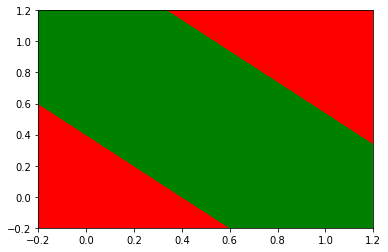

In [11]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt

#setup x,y, and h
x_plot = np.arange(-0.2, 1.4, 0.2)
y_plot = x_plot.reshape(-1, 1)
h = x_plot * y_plot
y_plot = np.arange(-0.2, 1.4, 0.2)

#go through the weights at different points
for i in range(0, 8):
    for j in range(0, 8):
        arr = np.array([[x_plot[i],y_plot[j]],[x_plot[i],y_plot[j]],[x_plot[i],y_plot[j]],[x_plot[i],y_plot[j]]])
        current_guess = sess.run(logits, feed_dict={X: arr})
        
        h[i][j] = np.round(current_guess[0][0])
        
#plot the graph
CS3 = plt.contourf(x_plot, y_plot, h, levels=[-100.0, 0.0, 100.0],
                   colors=('r', 'g'),
                   #origin=origin,
                   extend='both')